# NumPy - Fancy Indexing & Sorting

## Fancy Indexing

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size = 10)
print x

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [4]:
ind = np.array([[3,7],
                [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row, col]

array([ 2,  5, 11])

In [7]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

## Combined Indexing

In [9]:
print X

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [10]:
# combine fancy and simple indices
X[2, [2,0,1]]

array([10,  8,  9])

In [11]:
# combine fancy indexing with slicing
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [12]:
# combine fancy indexing with masking
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Example: Selecting Random Points

In [13]:
mean = [0,0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

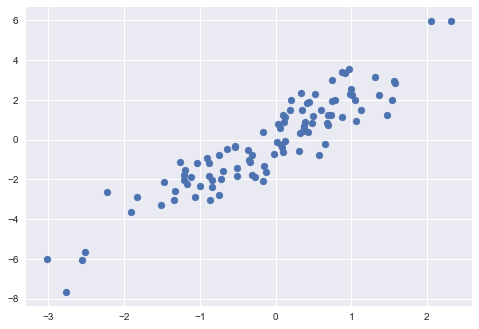

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.scatter(X[:, 0], X[:,1]);

In [15]:
# use fancy indexing to select 20 points
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([61, 66, 91, 32, 83, 76, 47, 27, 65, 44, 64, 40, 57, 54, 21, 87, 73,
       84, 43, 63])

In [16]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

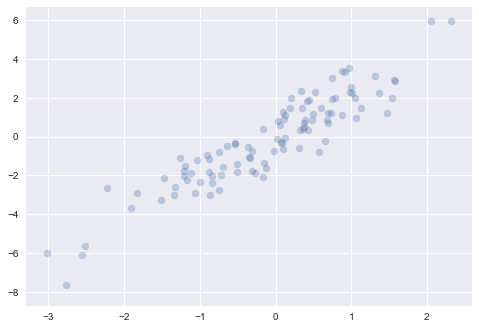

In [17]:
plt.scatter(X[:,0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=200);

This strategy is often used to quickly partition datasets, as often needed in train/test splitting for validation of statistical models and sampling approaches.

## Modifying Values with Fancy Indexing

In [18]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print x

[ 0 99 99  3 99  5  6  7 99  9]


In [19]:
# subtract 10 from each x[i]
x[i] -= 10

In [20]:
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

In [21]:
# repeated indices can cause some problems
x = np.zeros(10)
x[[0,0]] = [4,6]
print x
# the operation will first assign 4, then reassign 6

[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [22]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

One might expect x[3] = 2 and x[4] = 3. This is not the case because x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1. x[i] + 1 is evaluated, and then the result is assigned to the indices in x.

In [23]:
x = np.zeros(10)
x

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [24]:
np.add.at(x, i, 1)
x

array([ 0.,  0.,  1.,  2.,  3.,  0.,  0.,  0.,  0.,  0.])

#### np.reduceat

In [39]:
np.add.reduceat([0,1,2,3,4,5,6,7],[0,4,1,5,2,6,3,7])

array([ 6,  4, 10,  5, 14,  6, 18,  7])

In [67]:
np.add.reduceat([0,1,2,3,4,5,6,7],[0,6])

array([15, 13])

In [69]:
# Start with our 0->7 array and add all the numbers together
1+2+3+4+5+6+7

28

In [68]:
# Start at index 0 and add the values of the indices up to but not including i[4]
# i[0](0) + i[1](1) + i[2](2) + i[3](3) = 0+1+2+3 = 6 <- first value in answer
# total sum(28) - 6 = 22 <- 2nd value in answer
np.add.reduceat([0,1,2,3,4,5,6,7],[0,4])

array([ 6, 22])

In [77]:
np.add.reduceat([0,1,2,3,4,5,6,7],[4,1])
# guess - [22,6]

array([ 4, 28])

In [78]:
np.add.reduceat([0,1,2,3,4,5,6,7],[1,5])
# guess - [10,18]

array([10, 18])

In [79]:
np.add.reduceat([0,1,2,3,4,5,6,7],[5,2])
# guess - [5,27]

array([ 5, 27])

In [80]:
np.add.reduceat([0,1,2,3,4,5,6,7],[2,6])
# guess - [14,14]

array([14, 13])

In [81]:
np.add.reduceat([0,1,2,3,4,5,6,7],[6,3])
# guess - [6,25]

array([ 6, 25])

In [82]:
np.add.reduceat([0,1,2,3,4,5,6,7],[3,7])
# guess - [18,7]

array([18,  7])

In [83]:
np.add.reduceat([0,1,2,3,4,5,6,7],[0,4,1,5,2,6,3,7])

array([ 6,  4, 10,  5, 14,  6, 18,  7])

## Example: Binning Data

In [84]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

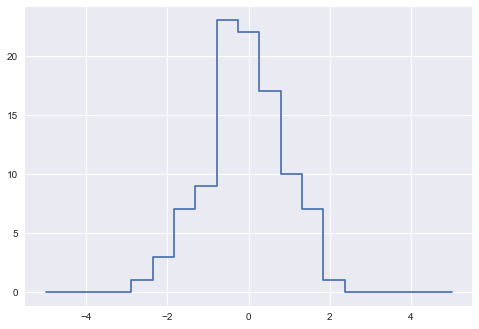

In [85]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

In [86]:
print "NumPy routine:"
%timeit counts, edges = np.histogram(x, bins)

print "Custom routine:"
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)


NumPy routine:
10000 loops, best of 3: 115 µs per loop
Custom routine:
The slowest run took 10.98 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 28.4 µs per loop


In [87]:
# The custom way is faster, but doesn't work as well with a larger array
x = np.random.randn(1000000)

print "NumPy routine:"
%timeit counts, edges = np.histogram(x, bins)

print "Custom routine:"
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
10 loops, best of 3: 93.2 ms per loop
Custom routine:
1 loop, best of 3: 187 ms per loop


## Sorting Arrays

#### Selection Sort - O(N^2)

In [93]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        print x
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [94]:
x = np.array([2, 1, 4, 3, 5])
x

array([2, 1, 4, 3, 5])

In [95]:
selection_sort(x)

[2 1 4 3 5]
[1 2 4 3 5]
[1 2 4 3 5]
[1 2 3 4 5]
[1 2 3 4 5]


array([1, 2, 3, 4, 5])

#### Bogosort - O(N * N!)

In [96]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [97]:
x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

## Fast Sorting in NumPy: np.sort and np.argsort

#### np.sort - O(N log N)

In [98]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [99]:
li = [2,1,4,3,5]
np.sort(li)

array([1, 2, 3, 4, 5])

In [100]:
x.sort()

print x

[1 2 3 4 5]


#### np.argsort - Returns the indices of sorted array

In [101]:
x = np.array([2,1,4,3,5])
i = np.argsort(x)

print i

[1 0 3 2 4]


In [102]:
x[i]

array([1, 2, 3, 4, 5])

#### Sorting along rows or columns

In [103]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))

print X

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [104]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [105]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## Partial Sorts: Partitioning

In [106]:
x = np.array([7,2,3,1,6,5,4])
# partition will find the 3 smallest values and move them to the left in arbitrary order
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

In [116]:
# 2D array partition
print X
np.partition(X, 2, axis=1)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## Example k-Nearest Neighbors

In [117]:
X = rand.rand(10, 2)

In [119]:
X

array([[ 0.00706631,  0.02306243],
       [ 0.52477466,  0.39986097],
       [ 0.04666566,  0.97375552],
       [ 0.23277134,  0.09060643],
       [ 0.61838601,  0.38246199],
       [ 0.98323089,  0.46676289],
       [ 0.85994041,  0.68030754],
       [ 0.45049925,  0.01326496],
       [ 0.94220176,  0.56328822],
       [ 0.3854165 ,  0.01596625]])

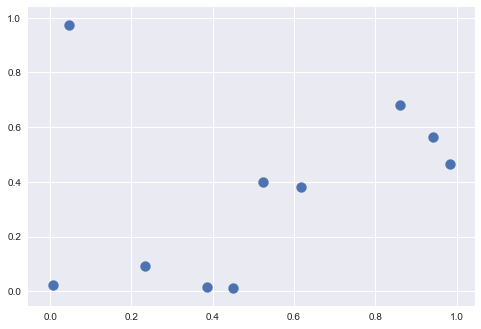

In [118]:
plt.scatter(X[:, 0], X[:, 1], s=100);

In [120]:
# Now compute distance between each pair of points
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

In [122]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [140]:
X[:, np.newaxis,:]

array([[[ 0.00706631,  0.02306243]],

       [[ 0.52477466,  0.39986097]],

       [[ 0.04666566,  0.97375552]],

       [[ 0.23277134,  0.09060643]],

       [[ 0.61838601,  0.38246199]],

       [[ 0.98323089,  0.46676289]],

       [[ 0.85994041,  0.68030754]],

       [[ 0.45049925,  0.01326496]],

       [[ 0.94220176,  0.56328822]],

       [[ 0.3854165 ,  0.01596625]]])

In [138]:
#X[:]
#X[:, np.newaxis]
#X[:, np.newaxis,:]
X[np.newaxis,:,:]

array([[[ 0.00706631,  0.02306243],
        [ 0.52477466,  0.39986097],
        [ 0.04666566,  0.97375552],
        [ 0.23277134,  0.09060643],
        [ 0.61838601,  0.38246199],
        [ 0.98323089,  0.46676289],
        [ 0.85994041,  0.68030754],
        [ 0.45049925,  0.01326496],
        [ 0.94220176,  0.56328822],
        [ 0.3854165 ,  0.01596625]]])

In [139]:
differences

array([[[ 0.        ,  0.        ],
        [-0.51770836, -0.37679855],
        [-0.03959936, -0.95069309],
        [-0.22570504, -0.06754401],
        [-0.6113197 , -0.35939957],
        [-0.97616458, -0.44370047],
        [-0.8528741 , -0.65724511],
        [-0.44343295,  0.00979746],
        [-0.93513545, -0.54022579],
        [-0.3783502 ,  0.00709617]],

       [[ 0.51770836,  0.37679855],
        [ 0.        ,  0.        ],
        [ 0.478109  , -0.57389455],
        [ 0.29200332,  0.30925454],
        [-0.09361135,  0.01739898],
        [-0.45845623, -0.06690192],
        [-0.33516575, -0.28044657],
        [ 0.07427541,  0.38659601],
        [-0.4174271 , -0.16342725],
        [ 0.13935816,  0.38389472]],

       [[ 0.03959936,  0.95069309],
        [-0.478109  ,  0.57389455],
        [ 0.        ,  0.        ],
        [-0.18610568,  0.88314908],
        [-0.57172035,  0.59129353],
        [-0.93656522,  0.50699263],
        [-0.81327474,  0.29344798],
        [-0.40383359,  0

In [141]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences

array([[[  0.00000000e+00,   0.00000000e+00],
        [  2.68021941e-01,   1.41977145e-01],
        [  1.56810915e-03,   9.03817359e-01],
        [  5.09427629e-02,   4.56219322e-03],
        [  3.73711781e-01,   1.29168048e-01],
        [  9.52897288e-01,   1.96870105e-01],
        [  7.27394233e-01,   4.31971139e-01],
        [  1.96632778e-01,   9.59902985e-05],
        [  8.74478311e-01,   2.91843907e-01],
        [  1.43148872e-01,   5.03556687e-05]],

       [[  2.68021941e-01,   1.41977145e-01],
        [  0.00000000e+00,   0.00000000e+00],
        [  2.28588213e-01,   3.29354951e-01],
        [  8.52659388e-02,   9.56383688e-02],
        [  8.76308468e-03,   3.02724521e-04],
        [  2.10182111e-01,   4.47586710e-03],
        [  1.12336078e-01,   7.86502769e-02],
        [  5.51683628e-03,   1.49456475e-01],
        [  1.74245380e-01,   2.67084648e-02],
        [  1.94206961e-02,   1.47375156e-01]],

       [[  1.56810915e-03,   9.03817359e-01],
        [  2.28588213e-01,   3

In [147]:
# sum the coordinate differences to get the squared distance
# add the left column and the right column at each pair
dist_sq = sq_differences.sum(-1)
dist_sq

array([[ 0.        ,  0.40999909,  0.90538547,  0.05550496,  0.50287983,
         1.14976739,  1.15936537,  0.19672877,  1.16632222,  0.14319923],
       [ 0.40999909,  0.        ,  0.55794316,  0.18090431,  0.00906581,
         0.21465798,  0.19098635,  0.15497331,  0.20095384,  0.16679585],
       [ 0.90538547,  0.55794316,  0.        ,  0.81458763,  0.67649219,
         1.13419594,  0.74752753,  1.08562368,  0.9704683 ,  1.03211241],
       [ 0.05550496,  0.18090431,  0.81458763,  0.        ,  0.23387834,
         0.70468321,  0.74108843,  0.05338715,  0.72671958,  0.0288717 ],
       [ 0.50287983,  0.00906581,  0.67649219,  0.23387834,  0.        ,
         0.14021843,  0.1470605 ,  0.16449241,  0.13755476,  0.18859392],
       [ 1.14976739,  0.21465798,  1.13419594,  0.70468321,  0.14021843,
         0.        ,  0.06080186,  0.48946337,  0.01100053,  0.56059965],
       [ 1.15936537,  0.19098635,  0.74752753,  0.74108843,  0.1470605 ,
         0.06080186,  0.        ,  0.61258786

In [149]:
dist_sq.diagonal()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [150]:
# Use np.argsort to sort along each row
# left most columns are indices of the nearest neighbors
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]])

In [151]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

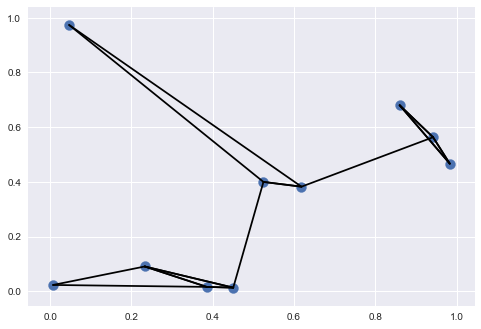

In [153]:
plt.scatter(X[:,0],X[:,1], s=100)

# draw lines from each point to its two nearest neighbors
K=2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

## Structured Data: NumPy's Structured Arrays

In [154]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [155]:
x = np.zeros(4, dtype=int)

In [156]:
# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print data.dtype

# U10 = unicode str max length 10
# i4 = 32bit integer
# f8 = 64bit float

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [157]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print data

[(u'Alice', 25,  55. ) (u'Bob', 45,  85.5) (u'Cathy', 37,  68. )
 (u'Doug', 19,  61.5)]


In [158]:
# Get all names
data['name']

array([u'Alice', u'Bob', u'Cathy', u'Doug'], 
      dtype='<U10')

In [159]:
# Get first row of data
data[0]

(u'Alice', 25,  55.)

In [160]:
# Get the name from the last row
data[-1]['name']

u'Doug'

In [161]:
# Get names where age is under 30
data[data['age'] < 30]['name']

array([u'Alice', u'Doug'], 
      dtype='<U10')

## Creating Structured Arrays

In [164]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [165]:
np.dtype({'names':('name', 'age', 'weight'),
          'formats':((np.str_,10), int, np.float32)})

dtype([('name', 'S10'), ('age', '<i8'), ('weight', '<f4')])

In [166]:
np.dtype([('name', 'S10'), ('age', 'i4'), ('weight', 'f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [167]:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

### NumPy data types

| Character | Description | Example                             |
|:---------------|:------------------|:-------------------------------------------|
| 'b'        | Byte        | np.dtype('b')                   |
| 'i'       | Signed integer       | np.dtype('i4') == np.int32               |
| 'u'       | Unsigned integer       | np.dtype('u1') == np.uint8                |
| 'f'        | Floating point        | np.dtype('f8') == np.int64                |
| 'c'        | Complex floating point        | np.dtype('c16') == np.complex128  |
| 'S','a' | string        | np.dtype('S5')                            |
| 'U'        | Unicode string         | np.dtype('U') == np.str_                  |
| 'V'     | Raw data (void)     | np.dtype('V') == np.void                |

## More Advanced Compound Types

In [169]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3,3))])
X = np.zeros(1, dtype=tp)
print X[0]
print X['mat'][0]

(0, [[ 0.,  0.,  0.], [ 0.,  0.,  0.], [ 0.,  0.,  0.]])
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


## RecordArrays: Structured Arrays with a Twist

In [170]:
data['age']

array([25, 45, 37, 19], dtype=int32)

In [171]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19], dtype=int32)

In [173]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

The slowest run took 41.00 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 198 ns per loop
100000 loops, best of 3: 7.48 µs per loop
The slowest run took 4.51 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 11.9 µs per loop
